<a href="https://colab.research.google.com/github/pireylow/LSTM-keras-stock-price-prediction/blob/main/MA%20Crossover%20Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


In [2]:
#import necessary modules
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [3]:
#set stock information
ticker = 'SPY'
startdate = '2020-12-01'
enddate = '2023-01-01'

start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)

[*********************100%***********************]  1 of 1 completed


In [4]:
close=sdata['Close']
close.describe()

count    525.000000
mean     415.581467
std       31.085925
min      356.559998
25%      389.500000
50%      415.739990
75%      441.149994
max      477.709991
Name: Close, dtype: float64

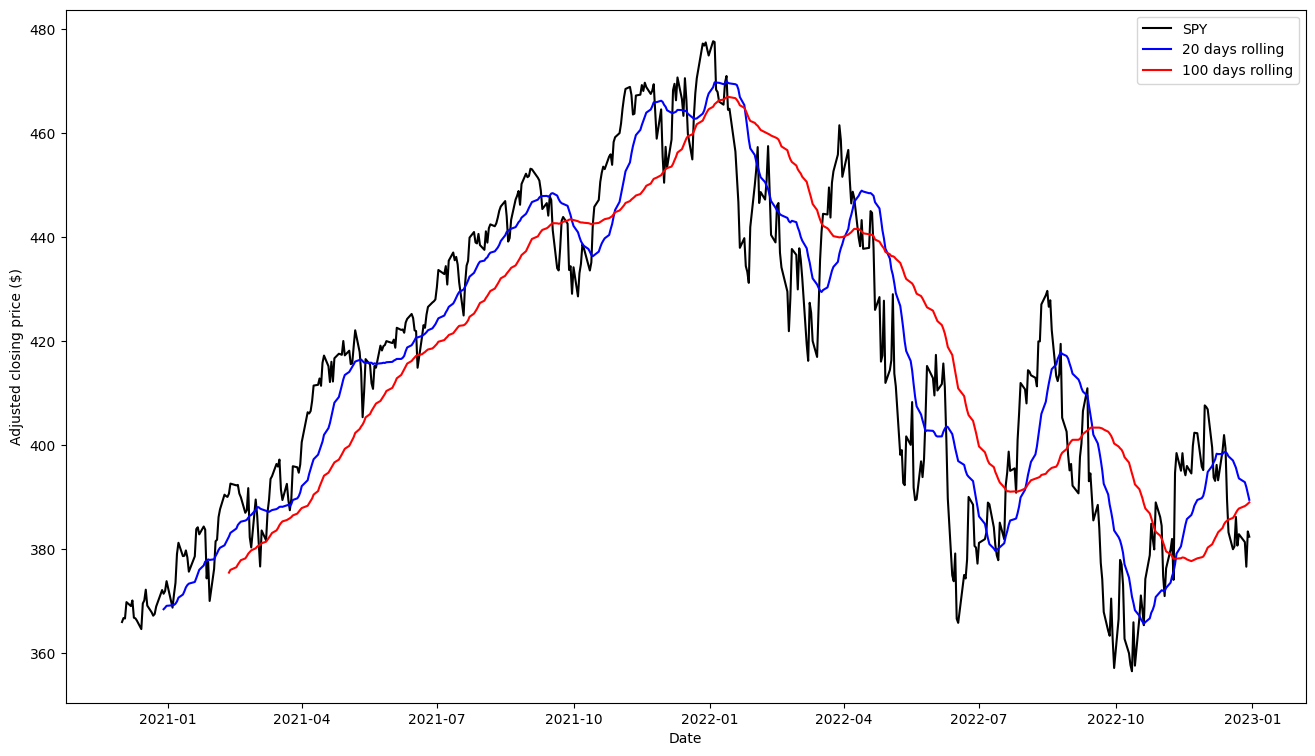

In [5]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
#ax.plot(close.index[-1], close[-1], 'x', markersize=24, markeredgewidth=6, color = 'r')
ax.legend()


50
209
289
356
451


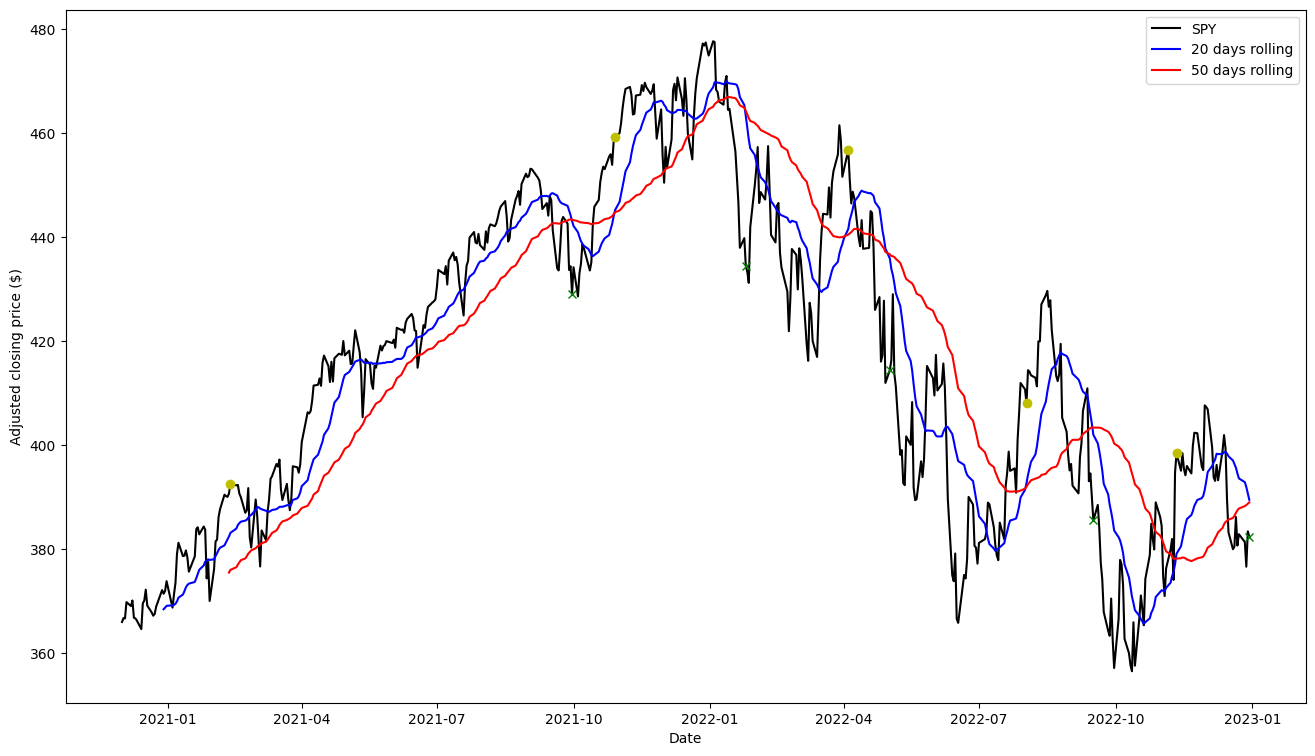

In [6]:

# Calculate the 20 and 50 days moving averages of the closing prices

fast_val = 20
slow_val = 50
short_rolling = close.rolling(window=fast_val).mean()
long_rolling = close.rolling(window=slow_val).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='50 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

time_counter = 50
profit_list = [ ]
profit_info = [ ]
profit = 0
FF_loop_flag = True
while FF_loop_flag:

  #FF to first up cross and save the entry price
  FF_loop_flag = True
  print(time_counter)
  while FF_loop_flag and short_rolling[time_counter] <= long_rolling[time_counter]:
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1
  entry_price = close[time_counter]
  profit_info.append(('entry', time_counter, entry_price))
  ax.plot(close.index[time_counter], entry_price, 'o', color = 'y')

  #FF to first up cross and save the exit price
  FF_loop_flag = True
  while FF_loop_flag and short_rolling[time_counter] >= long_rolling[time_counter]:
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1
  exit_price = close[time_counter]
  profit = profit + (exit_price - entry_price)
  profit_info.append(('exit', time_counter, exit_price, exit_price - entry_price))
  profit_list.append(exit_price - entry_price)
  ax.plot(close.index[time_counter], exit_price, 'x', color = 'g')



In [7]:
 profit_info

[('entry', 50, 392.6400146484375),
 ('exit', 209, 429.1400146484375, 36.5),
 ('entry', 230, 459.25),
 ('exit', 289, 434.4700012207031, -24.779998779296875),
 ('entry', 337, 456.79998779296875),
 ('exit', 356, 414.4800109863281, -42.319976806640625),
 ('entry', 419, 408.05999755859375),
 ('exit', 451, 385.55999755859375, -22.5),
 ('entry', 491, 398.510009765625),
 ('exit', 524, 382.42999267578125, -16.08001708984375)]

In [8]:
profit_list

[36.5, -24.779998779296875, -42.319976806640625, -22.5, -16.08001708984375]

In [9]:
profit

-69.17999267578125